<a href="https://colab.research.google.com/github/sun-fox/Deep-Learning-CNN/blob/master/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [0]:
n_pts = 500
centres = [[-1,1],[-1,-1],[1,1],[1,-1],[0,0]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centres,cluster_std=0.4)

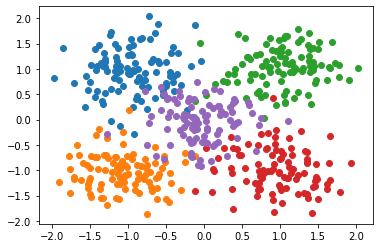

In [11]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [12]:
y_cat = to_categorical(y,5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [0]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x=X,y=y_cat, verbose=1, batch_size=50,epochs=10)

Epoch 1/10
500/500 [==============================] - 0s 239us/step - loss: 1.0665 - accuracy: 0.6060
Epoch 2/10
500/500 [==============================] - 0s 27us/step - loss: 0.5416 - accuracy: 0.8540
Epoch 3/10
500/500 [==============================] - 0s 25us/step - loss: 0.3853 - accuracy: 0.9280
Epoch 4/10
500/500 [==============================] - 0s 24us/step - loss: 0.3217 - accuracy: 0.9380
Epoch 5/10
500/500 [==============================] - 0s 25us/step - loss: 0.2848 - accuracy: 0.9380
Epoch 6/10
500/500 [==============================] - 0s 26us/step - loss: 0.2643 - accuracy: 0.9400
Epoch 7/10
500/500 [==============================] - 0s 26us/step - loss: 0.2502 - accuracy: 0.9320
Epoch 8/10
500/500 [==============================] - 0s 24us/step - loss: 0.2401 - accuracy: 0.9380
Epoch 9/10
500/500 [==============================] - 0s 23us/step - loss: 0.2327 - accuracy: 0.9420
Epoch 10/10
500/500 [==============================] - 0s 24us/step - loss: 0.2247 - accur

In [0]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

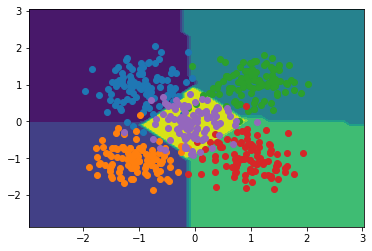

In [16]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

prediction is  [3]


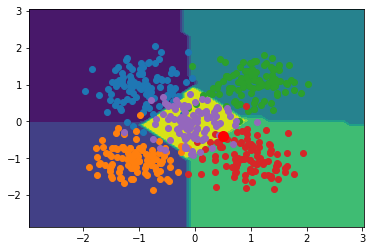

In [17]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

x=0.5
y=-0.4
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y], marker='o', markersize=10,color='r')
print("prediction is ",prediction)